In [ ]:
## Notebook env: random (R kernel)
## quantify frequency of guides in top 10% of increasing or decreasing CV across 10 random seeds of cell sampling

In [1]:
library(dplyr)
library(ggplot2)
library(twosamples)
library(ggrepel)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
adata.R = readRDS('/home/ssobti/projects/mir_tud/101423_filtered_data/tRF_normalized_integrated_seurat.rds')
seed1 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed1_metric_change_df.csv')
seed2 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed2_metric_change_df.csv')
seed3 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed3_metric_change_df.csv')
seed4 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed4_metric_change_df.csv')
seed5 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed5_metric_change_df.csv')
seed6 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed6_metric_change_df.csv')
seed7 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed7_metric_change_df.csv')
seed8 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed8_metric_change_df.csv')
seed9 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed9_metric_change_df.csv')
seed10 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seed10_metric_change_df.csv')

In [3]:
combined_df = list(seed1, seed2, seed3, seed4, seed5, seed6, seed7, seed8, seed9, seed10)
names(combined_df) = c('seed1', 'seed2', 'seed3', 'seed4', 'seed5', 'seed6', 'seed7', 'seed8', 'seed9', 'seed10')
combined_df = bind_rows(seed1, seed2, seed3, seed4, seed5, seed6, seed7, seed8, seed9, seed10, .id = 'seed') 

top_increasing_CV_guides = combined_df %>% group_by(seed) %>% filter(increasing_CV_genes > quantile(increasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character()
top_decreasing_CV_guides = combined_df %>% group_by(seed) %>% filter(decreasing_CV_genes > quantile(decreasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character()
top_increasing_CV_guides = table(top_increasing_CV_guides) %>% as.data.frame %>% arrange(-Freq) %>% head(10)
top_decreasing_CV_guides = table(top_decreasing_CV_guides) %>% as.data.frame %>% arrange(-Freq) %>% head(10)

## add number of cells in each guide
adata.R@meta.data %>% group_by(guide) %>% summarize(n = n()) -> n_cells
top_increasing_CV_guides$cells = 0
top_decreasing_CV_guides$cells = 0
top_increasing_CV_guides$top_increasing_CV_guides = as.character(top_increasing_CV_guides$top_increasing_CV_guides)
top_decreasing_CV_guides$top_decreasing_CV_guides = as.character(top_decreasing_CV_guides$top_decreasing_CV_guides)

for (i in 1:10){
    top_increasing_CV_guides$cells[i] = n_cells$n[n_cells$guide == ifelse(startsWith(top_increasing_CV_guides$top_increasing_CV_guides[i], 'random_'), gsub('random_', '', top_increasing_CV_guides$top_increasing_CV_guides[i]), top_increasing_CV_guides$top_increasing_CV_guides[i])]
    top_decreasing_CV_guides$cells[i] = n_cells$n[n_cells$guide == ifelse(startsWith(top_decreasing_CV_guides$top_decreasing_CV_guides[i], 'random_'), gsub('random_', '', top_decreasing_CV_guides$top_decreasing_CV_guides[i]), top_decreasing_CV_guides$top_decreasing_CV_guides[i])]
}

colnames(top_increasing_CV_guides)[2:3] = c('Freq in top 10% across 10 random starts', 'cells_before_equal_cell_sampling')
colnames(top_decreasing_CV_guides)[2:3] = c('Freq in top 10% across 10 random starts', 'cells_before_equal_cell_sampling')

In [4]:
top_increasing_CV_guides

,top_increasing_CV_guides,Freq in top 10% across 10 random starts,cells_before_equal_cell_sampling
,<chr>,<int>,<dbl>
1,tRNA-Met-CAT-(2)3-1.rh,7,35
2,tRNA-Leu-TAG-3-1.2t,6,51
3,tRNA-Lys-TTT-(5)3-1.2t,6,49
4,tRNA-Val-AAC-3-1.rh,6,40
5,random_tRF_SeC_TCA_2,4,104
6,tRF_iMet_CAT_2,4,90
7,tRF_Ser_AGA_2,4,238
8,tRNA-Arg-CCG-2-1.lh,4,62
9,tRNA-Asn-GTT-8-1.2t,4,74


In [5]:
top_decreasing_CV_guides

,top_decreasing_CV_guides,Freq in top 10% across 10 random starts,cells_before_equal_cell_sampling
,<chr>,<int>,<dbl>
1,random_tRNA-Ala-TGC-4-1.2t,3,30
2,tRF_Ser_CGA_2,3,333
3,tRNA-Val-AAC-3-1.rh,3,40
4,random_tRF_Asp_GTC_2,2,43
5,random_tRF_Gly_GCC_2,2,211
6,random_tRF_His_GTG_2,2,89
7,random_tRF_Ser_TGA_2,2,180
8,random_tRF_Thr_AGT.CGT_2,2,150
9,random_tRNA-Ala-AGC-1-1.2t,2,35


In [6]:
write.csv(top_increasing_CV_guides, '/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seeds_combined_top_increasing_CV_guides.csv')
write.csv(top_decreasing_CV_guides, '/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/CV_gene_median_aboveorequalto1_seeds_combined_top_decreasing_CV_guides.csv')

In [7]:
increasing_CV_guides = combined_df %>% group_by(seed) %>% filter(increasing_CV_genes > quantile(increasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character() %>% table() %>% as.data.frame %>% arrange(-Freq)
colnames(increasing_CV_guides)[1:2] = c('guide', 'Freq in top 10% across 10 random starts')
increasing_CV_guides$proportion = increasing_CV_guides$`Freq in top 10% across 10 random starts`/sum(increasing_CV_guides$`Freq in top 10% across 10 random starts`)
increasing_CV_guides$cumulative_proportion = cumsum(increasing_CV_guides$proportion)
increasing_CV_guides = increasing_CV_guides %>% arrange(-`Freq in top 10% across 10 random starts`)
increasing_CV_guides$type = ifelse(startsWith(as.character(increasing_CV_guides$guide), 'random_'), 'random', 'guide')

decreasing_CV_guides = combined_df %>% group_by(seed) %>% filter(decreasing_CV_genes > quantile(decreasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character() %>% table() %>% as.data.frame %>% arrange(-Freq)
colnames(decreasing_CV_guides)[1:2] = c('guide', 'Freq in top 10% across 10 random starts')
decreasing_CV_guides$proportion = decreasing_CV_guides$`Freq in top 10% across 10 random starts`/sum(decreasing_CV_guides$`Freq in top 10% across 10 random starts`)
decreasing_CV_guides$cumulative_proportion = cumsum(decreasing_CV_guides$proportion)
decreasing_CV_guides = decreasing_CV_guides %>% arrange(-`Freq in top 10% across 10 random starts`)
decreasing_CV_guides$type = ifelse(startsWith(as.character(decreasing_CV_guides$guide), 'random_'), 'random', 'guide')

head(increasing_CV_guides)
head(decreasing_CV_guides)

,guide,Freq in top 10% across 10 random starts,proportion,cumulative_proportion,type
,<fct>,<int>,<dbl>,<dbl>,<chr>
1,tRNA-Met-CAT-(2)3-1.rh,7,0.03664921,0.03664921,guide
2,tRNA-Leu-TAG-3-1.2t,6,0.03141361,0.06806283,guide
3,tRNA-Lys-TTT-(5)3-1.2t,6,0.03141361,0.09947644,guide
4,tRNA-Val-AAC-3-1.rh,6,0.03141361,0.13089005,guide
5,random_tRF_SeC_TCA_2,4,0.02094241,0.15183246,random
6,tRF_iMet_CAT_2,4,0.02094241,0.17277487,guide


,guide,Freq in top 10% across 10 random starts,proportion,cumulative_proportion,type
,<fct>,<int>,<dbl>,<dbl>,<chr>
1,random_tRNA-Ala-TGC-4-1.2t,3,0.02255639,0.02255639,random
2,tRF_Ser_CGA_2,3,0.02255639,0.04511278,guide
3,tRNA-Val-AAC-3-1.rh,3,0.02255639,0.06766917,guide
4,random_tRF_Asp_GTC_2,2,0.01503759,0.08270677,random
5,random_tRF_Gly_GCC_2,2,0.01503759,0.09774436,random
6,random_tRF_His_GTG_2,2,0.01503759,0.11278195,random


## Graphs

In [8]:
## ecdf of increasing CV guides
## draw smooth ecdf graphs
library(tidyverse)            
dat = increasing_CV_guides
dat$x = dat$`Freq in top 10% across 10 random starts`
dat$group = dat$type


# Split the data by group and calculate the smoothed cumulative density for each group
dens = split(dat, dat$group) %>% 
  map_df(function(d) {
    dens = density(d$x, adjust=0.1, from=min(dat$x) - 0.05*diff(range(dat$x)), 
                   to=max(dat$x) + 0.05*diff(range(dat$x)))
    data.frame(x=dens$x, y=dens$y, cd=cumsum(dens$y)/sum(dens$y), group=d$group[1])
  })

dens$group = factor(dens$group, levels=c("random", "guide"))

## smooth ecdf
increasing_CV_smooth_ecdf = ggplot() +
  geom_line(data=dens, aes(x, cd, colour=group)) + scale_color_hue(direction = -1) + xlab('Freq in top 10% across 10 random starts') + ylab('Cumulative density') +
  theme_classic()

## rough step ecdf
#ggplot(increasing_CV_guides, aes(`Freq in top 10% across 10 random starts`, color = type)) + scale_color_hue(direction = -1) + stat_ecdf(geom = "step") + theme_classic()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [9]:
## ecdf of decreasing CV guides
## draw smooth ecdf graphs         
dat = decreasing_CV_guides
dat$x = dat$`Freq in top 10% across 10 random starts`
dat$group = dat$type


# Split the data by group and calculate the smoothed cumulative density for each group
dens = split(dat, dat$group) %>% 
  map_df(function(d) {
    dens = density(d$x, adjust=0.1, from=min(dat$x) - 0.05*diff(range(dat$x)), 
                   to=max(dat$x) + 0.05*diff(range(dat$x)))
    data.frame(x=dens$x, y=dens$y, cd=cumsum(dens$y)/sum(dens$y), group=d$group[1])
  })

dens$group = factor(dens$group, levels=c("random", "guide"))

## smooth ecdf
decreasing_CV_smooth_ecdf = ggplot() +
  geom_line(data=dens, aes(x, cd, colour=group)) + scale_color_hue(direction = -1) + xlab('Freq in top 10% across 10 random starts') + ylab('Cumulative density') +
  theme_classic()

## rough step ecdf
#ggplot(decreasing_CV_guides, aes(`Freq in top 10% across 10 random starts`, color = type)) + scale_color_hue(direction = -1) + stat_ecdf(geom = "step") + theme_classic()

In [10]:
## plot median z-scores of top guides selected above
## median of top guides vs top random guides
top_increasing_CV_guides_full = combined_df %>% group_by(seed) %>% dplyr::filter(increasing_CV_genes > quantile(increasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character() %>% table() %>% as.data.frame %>% arrange(-Freq)
colnames(top_increasing_CV_guides_full)[1:2] = c('guide', 'Freq in top 10% across 10 random starts')
top_increasing_CV_guides_full$guide = as.character(top_increasing_CV_guides_full$guide)
top_decreasing_CV_guides_full = combined_df %>% group_by(seed) %>% dplyr::filter(decreasing_CV_genes > quantile(decreasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character() %>% table() %>% as.data.frame %>% arrange(-Freq)
colnames(top_decreasing_CV_guides_full)[1:2] = c('guide', 'Freq in top 10% across 10 random starts')
top_decreasing_CV_guides_full$guide = as.character(top_decreasing_CV_guides_full$guide)
top_guides_medians_increasing_CV = combined_df %>% dplyr::filter(guide %in% top_increasing_CV_guides_full$guide[!startsWith(top_increasing_CV_guides_full$guide, 'random_')][1:4]) %>% group_by(guide) %>% summarize(median_z_score_increasing_genes = median(z_score_increasing_genes))
top_randoms_medians_increasing_CV = combined_df %>% dplyr::filter(guide %in% top_increasing_CV_guides_full$guide[startsWith(top_increasing_CV_guides_full$guide, 'random_')][1:4]) %>% group_by(guide) %>% summarize(median_z_score_increasing_genes = median(z_score_increasing_genes))
top_guides_medians_increasing_CV = bind_rows(top_guides_medians_increasing_CV %>% mutate(group = "guide"), top_randoms_medians_increasing_CV %>% mutate(group = "random"))

top_guides_medians_decreasing_CV = combined_df %>% dplyr::filter(guide %in% top_decreasing_CV_guides_full$guide[!startsWith(top_decreasing_CV_guides_full$guide, 'random_')][1:4]) %>% group_by(guide) %>% summarize(median_z_score_decreasing_genes = median(z_score_decreasing_genes))
top_randoms_medians_decreasing_CV = combined_df %>% dplyr::filter(guide %in% top_decreasing_CV_guides_full$guide[startsWith(top_decreasing_CV_guides_full$guide, 'random_')][1:4]) %>% group_by(guide) %>% summarize(median_z_score_decreasing_genes = median(z_score_decreasing_genes))
top_guides_medians_decreasing_CV = bind_rows(top_guides_medians_decreasing_CV %>% mutate(group = "guide"), top_randoms_medians_decreasing_CV %>% mutate(group = "random"))

top_guides_medians_increasing_CV$group = factor(top_guides_medians_increasing_CV$group, levels = c("random", "guide"))
top_guides_medians_decreasing_CV$group = factor(top_guides_medians_decreasing_CV$group, levels = c("random", "guide"))

saveRDS(top_guides_medians_increasing_CV, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/tRF_select_top_guides_medians_increasing_CV.rds')
saveRDS(top_guides_medians_decreasing_CV, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/tRF_select_top_guides_medians_decreasing_CV.rds')

## median z-scores of top guides (4) above first randomized guide and top 4 randomized guides
## increasing CV
select_guides_increasing_CV_z_score_medians = ggplot(top_guides_medians_increasing_CV, aes(x = group, y = median_z_score_increasing_genes, fill = group)) +
  geom_boxplot() + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1), plot.title = element_text(hjust = 0.5, margin = margin(0,0,12,0)), plot.margin = unit(c(0.8, 0.5, 0.5, 0.5), 'cm'),
    axis.title.x = element_blank(), legend.position = 'none') + scale_fill_hue(direction = -1) + ylab('Median z-score of top guides') + coord_cartesian(clip = 'off') + ylim(-1, 5)
## decreasing CV
select_guides_decreasing_CV_z_score_medians = ggplot(top_guides_medians_decreasing_CV, aes(x = group, y = median_z_score_decreasing_genes, fill = group)) +
  geom_boxplot() + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1), plot.title = element_text(hjust = 0.5, margin = margin(0,0,12,0)), plot.margin = unit(c(0.8, 0.5, 0.5, 0.5), 'cm'),
    axis.title.x = element_blank(), legend.position = 'none') + scale_fill_hue(direction = -1) + ylab('Median z-score of top guides') + coord_cartesian(clip = 'off') + ylim(-1, 5)



In [11]:
head(top_guides_medians_decreasing_CV)

guide,median_z_score_decreasing_genes,group
<chr>,<dbl>,<fct>
tRF_Ala_AGC_2,-0.1832249,guide
tRF_Ala_CGC.AGC.TGC_5,-0.2359317,guide
tRF_Ser_CGA_2,-0.1832249,guide
tRNA-Val-AAC-3-1.rh,-0.1832249,guide
random_tRF_Asp_GTC_2,-0.1415941,random
random_tRF_Gly_GCC_2,-0.1832249,random


In [12]:
## ks test and t-test -- Anderson-Darling test also tried
ks_tests = list()
t_tests = list()
ad_tests = list()
increasing_CV_guides$guide = as.character(increasing_CV_guides$guide)
decreasing_CV_guides$guide = as.character(decreasing_CV_guides$guide)
combined_list = list(increasing_CV_guides, decreasing_CV_guides)
for (i in 1:length(combined_list)){
    guides = combined_list[[i]]$guide
    freq = combined_list[[i]]$`Freq in top 10% across 10 random starts`
    ks_tests[[i]] = ks.test(freq[!startsWith(guides, 'random_')], freq[startsWith(guides, 'random_')], alternative = 'less')
    ks_tests[[i]] = ks_tests[[i]]$p.value
    ad_tests[[i]] = ad_test(freq[!startsWith(guides, 'random_')], freq[startsWith(guides, 'random_')])
    ad_tests[[i]] = as.numeric(ad_tests[[i]]['P-Value'])
    if (i %% 2 == 1){
        t_tests[[i]] = t.test(subset(top_guides_medians_increasing_CV, group == 'guide')$median_z_score_increasing_genes, subset(top_guides_medians_increasing_CV, group == 'random')$median_z_score_increasing_genes, alternative = 'greater')
        t_tests[[i]] = t_tests[[i]]$p.value
    } else {
        t_tests[[i]] = t.test(subset(top_guides_medians_decreasing_CV, group == 'guide')$median_z_score_decreasing_genes, subset(top_guides_medians_decreasing_CV, group == 'random')$median_z_score_decreasing_genes, alternative = 'less')
        t_tests[[i]] = t_tests[[i]]$p.value
    }
}
t_tests = unlist(t_tests)
ks_tests = unlist(ks_tests)
ad_tests = unlist(ad_tests)
t_tests = p.adjust(t_tests, method = 'fdr')
ks_tests = p.adjust(ks_tests, method = 'fdr')
ad_tests = p.adjust(ad_tests, method = 'fdr')

In [13]:
t_tests
ks_tests
ad_tests

[1] 0.08521189 0.62482013

[1] 0.0005311299 0.0617060583

[1] 0.0005 0.1535

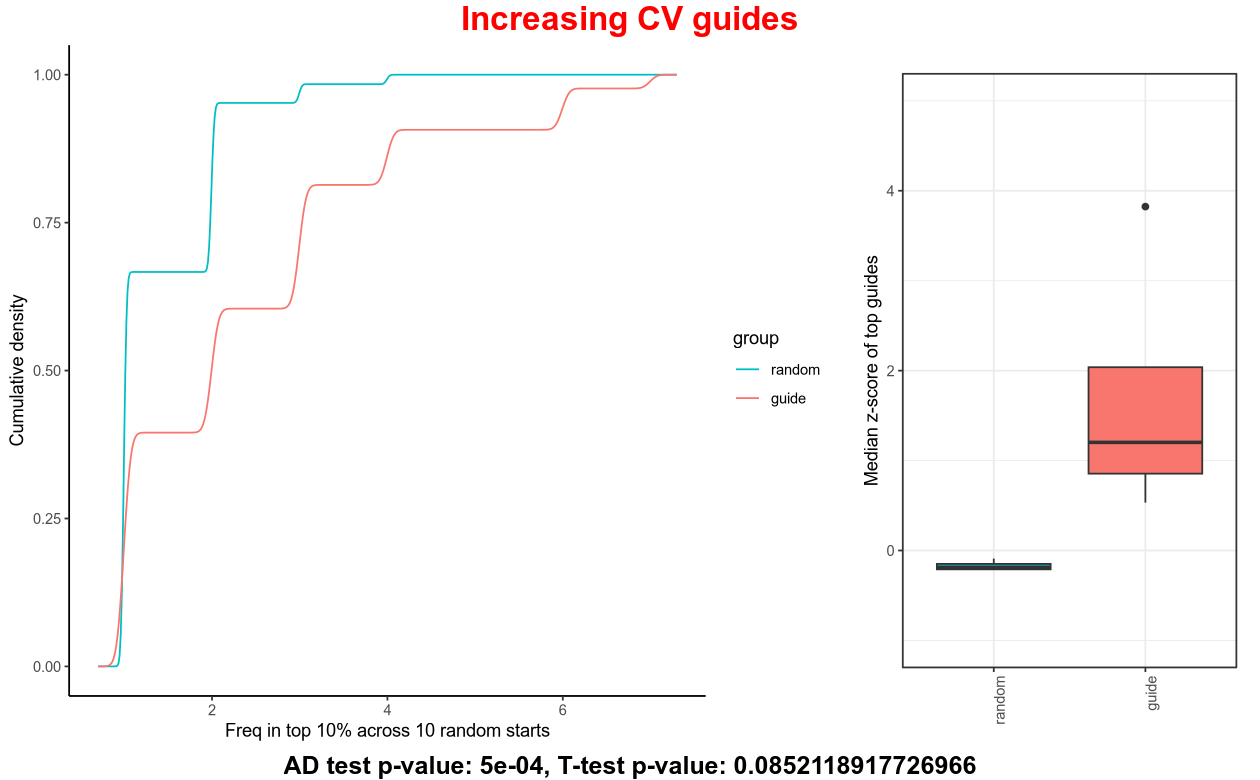

In [14]:
library(ggpubr)
options(repr.plot.width = 10.5, repr.plot.height = 6.5)
figure = ggarrange(increasing_CV_smooth_ecdf, select_guides_increasing_CV_z_score_medians, ncol = 2, nrow = 1, widths = c(1, 0.5))
annotate_figure(figure, top = text_grob("Increasing CV guides", color = "red", face = "bold", size = 20), bottom = text_grob(paste0("AD test p-value: ", ad_tests[1], ", T-test p-value: ", t_tests[1]), color = "black", face = "bold", size = 15))
ggsave('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/increasing_cv_guides.pdf', width = 10.5, height = 6.5)

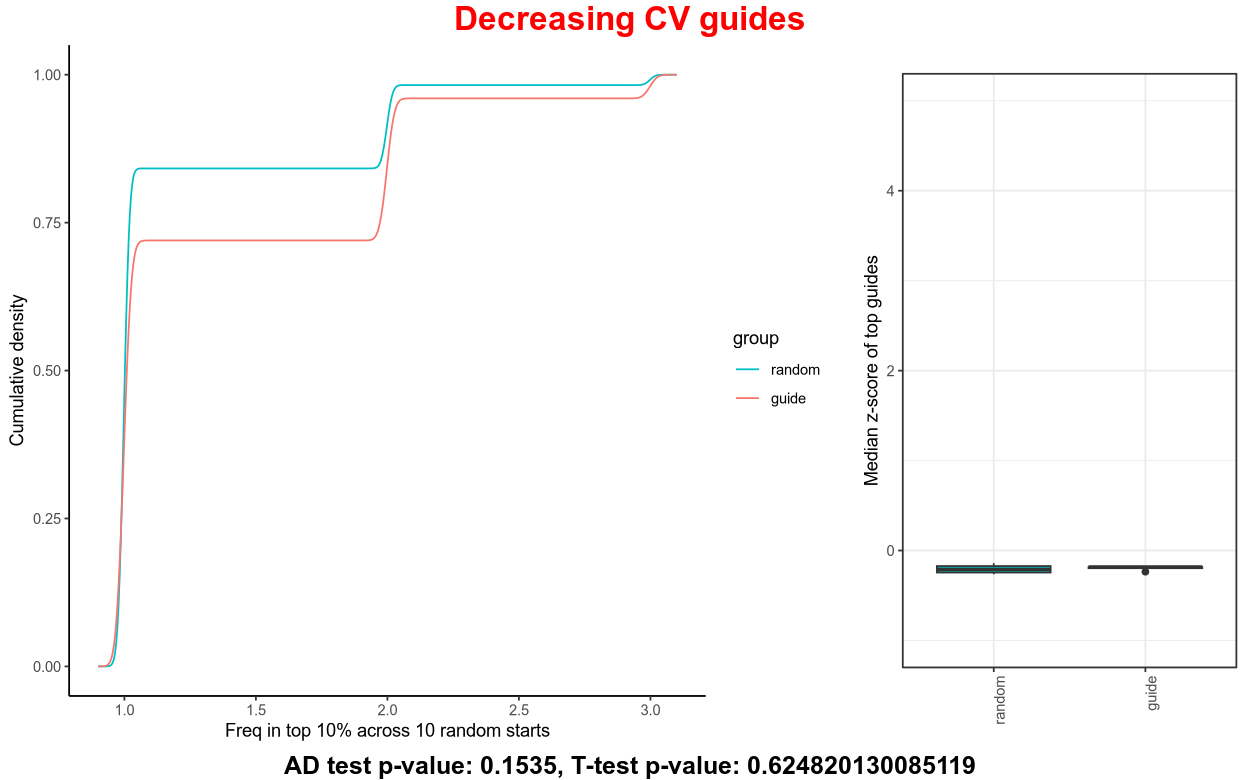

In [15]:
figure = ggarrange(decreasing_CV_smooth_ecdf, select_guides_decreasing_CV_z_score_medians, ncol = 2, nrow = 1, widths = c(1, 0.5))
annotate_figure(figure, top = text_grob("Decreasing CV guides", color = "red", face = "bold", size = 20), bottom = text_grob(paste0("AD test p-value: ", ad_tests[2], ", T-test p-value: ", t_tests[2]), color = "black", face = "bold", size = 15))
ggsave('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/decreasing_cv_guides.pdf', width = 10.5, height = 6.5)

Warning message:
“ggrepel: 495 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


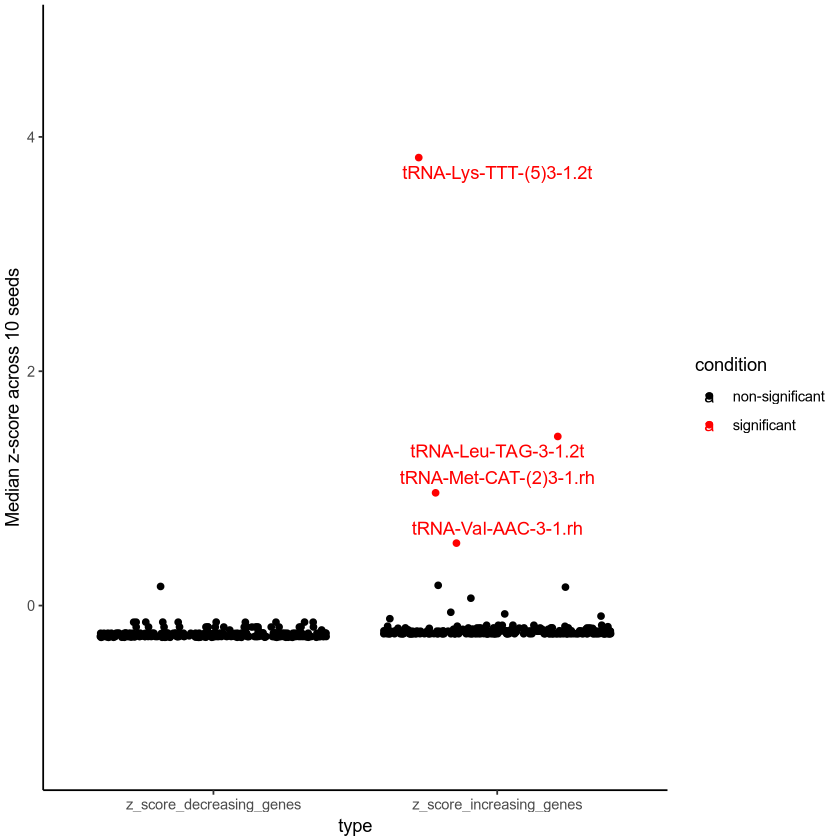

In [16]:
options(repr.plot.width = 7, repr.plot.height = 7)
## find median z-scores for heterogeniety across the 10 random seeds
median_z_scores = combined_df %>% group_by(guide) %>% summarize(z_score_increasing_genes = median(z_score_increasing_genes), z_score_decreasing_genes = median(z_score_decreasing_genes))
median_z_scores_long = median_z_scores %>% pivot_longer(cols = c(z_score_increasing_genes, z_score_decreasing_genes), names_to = 'type', values_to = 'median_z_score')
median_z_scores_long$condition = ifelse(abs(median_z_scores_long$median_z_score) > 0.5, 'significant', 'non-significant')
saveRDS(median_z_scores_long, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/tRF_median_z_scores_long.rds')

ggplot(median_z_scores_long, aes(x = type, y = median_z_score, color = condition)) + geom_jitter() + geom_text_repel(aes(y = median_z_score, x = type, label = guide), direction = "y") + theme_classic() + scale_color_manual(values = c('significant' = 'red', 'non-significant' = 'black')) +
ylab('Median z-score across 10 seeds') + coord_cartesian(clip = 'off') + ylim(min(median_z_scores_long$median_z_score) - 1, max(median_z_scores_long$median_z_score) + 1) + theme(plot.margin = margin(0.1, 0.1, 0.1, 0.1, "cm"))

In [77]:
ggsave('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/median_z_scores.pdf', width = 7, height = 7)

Warning message:
“ggrepel: 496 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
